<a href="https://colab.research.google.com/github/lapatradaa/shap/blob/main/fix%20mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import shutil

In [2]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dt_train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_train_Predict.csv')
dt_train

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Fold,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V1.jpg,2,0,Female,7.107492,7.0,0.000003,Female,0.0
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV1.jpg,4,0,Female,7.020138,7.0,0.000025,Female,0.0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V2.jpg,10,0,Female,6.975561,7.0,0.000808,Female,0.0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV2.jpg,9,0,Female,6.938187,7.0,0.000107,Female,0.0
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V3.jpg,10,0,Female,6.916692,7.0,0.000014,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,4184,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J375.jpg,3,1,Male,25.299234,25.0,0.999988,Male,1.0
4185,4185,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J437.jpg,5,1,Male,24.729193,25.0,0.999987,Male,1.0
4186,4186,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J480.jpg,5,1,Male,24.564425,25.0,1.000000,Male,1.0
4187,4187,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J491.jpg,6,1,Male,24.113144,24.0,1.000000,Male,1.0


In [4]:
df = dt_train.drop(dt_train.columns[0], axis=1)
df

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Fold,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V1.jpg,2,0,Female,7.107492,7.0,0.000003,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV1.jpg,4,0,Female,7.020138,7.0,0.000025,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V2.jpg,10,0,Female,6.975561,7.0,0.000808,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV2.jpg,9,0,Female,6.938187,7.0,0.000107,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V3.jpg,10,0,Female,6.916692,7.0,0.000014,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J375.jpg,3,1,Male,25.299234,25.0,0.999988,Male,1.0
4185,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J437.jpg,5,1,Male,24.729193,25.0,0.999987,Male,1.0
4186,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J480.jpg,5,1,Male,24.564425,25.0,1.000000,Male,1.0
4187,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J491.jpg,6,1,Male,24.113144,24.0,1.000000,Male,1.0


In [5]:
# นับรูป
# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (111, 15)
Age 8: (116, 15)
Age 9: (122, 15)
Age 10: (114, 15)
Age 11: (114, 15)
Age 12: (119, 15)
Age 13: (106, 15)
Age 14: (110, 15)
Age 15: (110, 15)
Age 16: (112, 15)
Age 17: (107, 15)
Age 18: (104, 15)
Age 19: (107, 15)
Age 20: (105, 15)
Age 21: (107, 15)
Age 22: (97, 15)
Age 23: (108, 15)
Age 24: (104, 15)
Age 25: (96, 15)
Age 7: (114, 15)
Age 8: (116, 15)
Age 9: (120, 15)
Age 10: (116, 15)
Age 11: (117, 15)
Age 12: (117, 15)
Age 13: (108, 15)
Age 14: (113, 15)
Age 15: (117, 15)
Age 16: (118, 15)
Age 17: (112, 15)
Age 18: (128, 15)
Age 19: (115, 15)
Age 20: (99, 15)
Age 21: (100, 15)
Age 22: (105, 15)
Age 23: (101, 15)
Age 24: (91, 15)
Age 25: (113, 15)


In [6]:
# เลือกรูปจาก train มาทำ bg data
import pandas as pd
import random

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Age(year)': dt_train['Age(year)'],
    'Gender': dt_train['Gender'],
    'Folder_type': dt_train['Folder_type'],
    'Folder_name': dt_train['Folder_name'],
    'Path_Name': dt_train['Path_Name'],
    'Filename': dt_train['Filename'],
}

df = pd.DataFrame(data)

# Calculate the desired number of rows per unique age
desired_per_age = 2660 // (25 - 7 + 1)

# Initialize a list to store selected rows
selected_rows = []

# Iterate through unique age values
for age in range(7, 26):
    # Get all rows with the current age
    age_rows = df[df['Age(year)'] == age]

    # Randomly shuffle the rows for this age
    age_rows = age_rows.sample(frac=1, random_state=42)

    # Determine the number of rows to select for each gender
    rows_per_gender = desired_per_age // 2

    # Select rows for both "Male" and "Female" genders
    selected_male_rows = age_rows[age_rows['Gender'] == 'M'].head(rows_per_gender)
    selected_female_rows = age_rows[age_rows['Gender'] == 'F'].head(rows_per_gender)

    # Append the selected rows to the list
    selected_rows.extend([selected_male_rows, selected_female_rows])

# Concatenate the selected rows for each age into a final DataFrame
selected_dft = pd.concat(selected_rows)

# Now, selected_df contains 950 rows with an approximately even distribution of ages from 7 to 25
# and an equal number of "Male" and "Female" samples for each age.


In [7]:
# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)
Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)


In [8]:
df_test_gender = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_test_Predict.csv')
df_test_gender = df_test_gender.iloc[:,1:]
print(df_test_gender.shape)
df_test_gender

(943, 13)


,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,0,Female,21.118502,21.0,1.193671e-01,Female,0.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0


In [9]:
# เลือกเฉพาะ row ที่ทายถูก
c = df_test_gender[((df_test_gender['Gender_predict_str'] == 'Female') & (df_test_gender['Gender'] == 'F')) | ((df_test_gender['Gender_predict_str'] == 'Male') & (df_test_gender['Gender'] == 'M'))]
c

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,0,Female,21.118502,21.0,1.193671e-01,Female,0.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0


In [10]:
def process_input(dt_train):
    # Initialize an empty list to store background data
    background_data = []

    # Ensure 'Path_Name' column exists in the DataFrame
    if 'Path_Name' not in dt_train.columns:
        raise ValueError("The 'Path_Name' column does not exist in the DataFrame.")

    # Loop to preprocess and create the background data
    for i in range(len(dt_train)):
        print(f"Processing image {i+1}/{len(dt_train)}")
        # Get the image path from the DataFrame
        image_path = dt_train['Path_Name'].iloc[i]  # Use .iloc to access rows by integer index
        # Load and preprocess the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size
        preprocessed_image = img_to_array(image) / 255.0  # Normalize pixel values

        # Add the preprocessed image to the background_data list
        background_data.append(preprocessed_image)

    return background_data

In [11]:
import pandas as pd
import numpy as np
import torch
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [12]:
sdf_train = selected_dft.sort_values(by='Age(year)', kind='mergesort')
sdf_train

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
184,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV116.jpg
120,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV13.jpg
207,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV244.jpg
148,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV50.jpg
214,7,M,Normal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV28.jpg
...,...,...,...,...,...,...
4050,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J245.jpg
4044,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J218.jpg
4024,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J148.jpg
4020,25,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J144.jpg


In [13]:
background_train = process_input(sdf_train)

Processing image 1/2660
Processing image 2/2660
Processing image 3/2660
Processing image 4/2660
Processing image 5/2660
Processing image 6/2660
Processing image 7/2660
Processing image 8/2660
Processing image 9/2660
Processing image 10/2660
Processing image 11/2660
Processing image 12/2660
Processing image 13/2660
Processing image 14/2660
Processing image 15/2660
Processing image 16/2660
Processing image 17/2660
Processing image 18/2660
Processing image 19/2660
Processing image 20/2660
Processing image 21/2660
Processing image 22/2660
Processing image 23/2660
Processing image 24/2660
Processing image 25/2660
Processing image 26/2660
Processing image 27/2660
Processing image 28/2660
Processing image 29/2660
Processing image 30/2660
Processing image 31/2660
Processing image 32/2660
Processing image 33/2660
Processing image 34/2660
Processing image 35/2660
Processing image 36/2660
Processing image 37/2660
Processing image 38/2660
Processing image 39/2660
Processing image 40/2660
Processin

In [14]:
# เลือกเฉพาะ row ที่ทายถูก
c = df_test_gender[((df_test_gender['Gender_predict_str'] == 'Female') & (df_test_gender['Gender'] == 'F')) | ((df_test_gender['Gender_predict_str'] == 'Male') & (df_test_gender['Gender'] == 'M'))]
c

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,0,Female,21.118502,21.0,1.193671e-01,Female,0.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0


In [15]:
# ทำค่า Prob
c['prob'] = c.apply(lambda row: 1 - row['Gender_predict'] if row['Gender'] == 'F' else row['Gender_predict'], axis=1)
#Select rows where 'prob' is greater than 0.9
d = c[c['prob'] > 0.90]

# Display the selected rows
d

<ipython-input-15-3c38c93a3af5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['prob'] = c.apply(lambda row: 1 - row['Gender_predict'] if row['Gender'] == 'F' else row['Gender_predict'], axis=1)


,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J86.jpg,0,Female,19.068132,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0,1.000000


In [16]:
selected_test = d
selected_test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J86.jpg,0,Female,19.068132,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0,1.000000


In [17]:
sdf_test = selected_test.sort_values(by='Age(year)', kind='mergesort')
sdf_test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,5.141945e-03,Female,0.0,0.994858
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,4.618836e-02,Female,0.0,0.953812
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,6.406498e-03,Female,0.0,0.993594
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,2.021052e-05,Female,0.0,0.999980
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,2.091009e-02,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J86.jpg,0,Female,19.068132,19.0,9.307945e-06,Female,0.0,0.999991
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,0,Female,21.686228,22.0,1.800820e-05,Female,0.0,0.999982
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,0,Female,19.639433,20.0,1.212668e-03,Female,0.0,0.998787
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,0,Female,21.359797,21.0,3.044503e-09,Female,0.0,1.000000


In [18]:
background_test = process_input(sdf_test)

Processing image 1/753
Processing image 2/753
Processing image 3/753
Processing image 4/753
Processing image 5/753
Processing image 6/753
Processing image 7/753
Processing image 8/753
Processing image 9/753
Processing image 10/753
Processing image 11/753
Processing image 12/753
Processing image 13/753
Processing image 14/753
Processing image 15/753
Processing image 16/753
Processing image 17/753
Processing image 18/753
Processing image 19/753
Processing image 20/753
Processing image 21/753
Processing image 22/753
Processing image 23/753
Processing image 24/753
Processing image 25/753
Processing image 26/753
Processing image 27/753
Processing image 28/753
Processing image 29/753
Processing image 30/753
Processing image 31/753
Processing image 32/753
Processing image 33/753
Processing image 34/753
Processing image 35/753
Processing image 36/753
Processing image 37/753
Processing image 38/753
Processing image 39/753
Processing image 40/753
Processing image 41/753
Processing image 42/753
P

In [19]:
background_train_array = np.array(background_train)
background_test_array = np.array(background_test)

In [20]:
import os
import numpy as np
import pandas as pd
#import efficientnet.tfkeras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

In [21]:
batch_size = 16
width = 224
height = 224
epochs = 250 # รอบในการเทรน
dropout_rate = 0.2
input_shape = (height, width, 3)

In [22]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 26.63 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


In [23]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})


In [24]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 112, 112, 32)         0         ['batch_normalization[0][0

In [25]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


In [26]:
!pip install shap==0.44.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.2 MB/s eta 0:00:00


In [27]:
import shap

In [28]:
model.output_names

['prediction_layer', 'prediction_layer2']

In [29]:
import shap
import tensorflow as tf

# Create separate models for each output you want to explain
#AGE
model_layer1 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer').output)
#Gender
model_layer2 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer2').output)
# Define your explainer for the first output layer (prediction_layer)
#AGE
explainer_layer1 = shap.GradientExplainer(model_layer1, background_train_array)
# Define your explainer for the second output layer (prediction_layer2)
#Gender
explainer_layer2 = shap.GradientExplainer(model_layer2, background_train_array)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


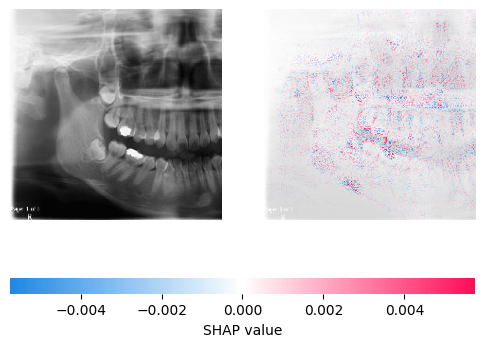

In [30]:
shap_values_E244_23Y_F = explainer_layer2.shap_values(background_test_array[[620]])
%matplotlib inline
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

In [31]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

grayscale_pos_thresholded
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


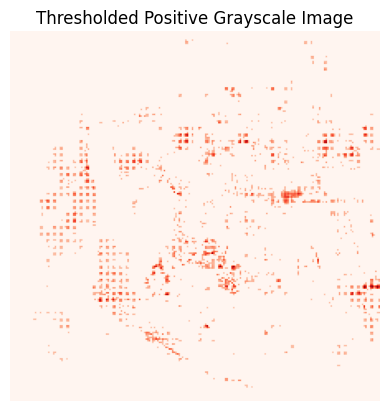

In [35]:
#pos percentile
#pos
data= [np.array(shap_values_E244_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
flattened_array_pos = positive.flatten()
normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_positive = normalized_array_pos.reshape(positive.shape)
grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_positive = grayscale_image_positive.squeeze()
# ปรับค่า
percentile_pos = np.percentile(grayscale_image_positive, 95)
grayscale_pos_thresholded = np.copy(grayscale_image_positive)
grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_pos] = 0
filtered_array_grayscale_pos_thresholded = grayscale_pos_thresholded[grayscale_pos_thresholded != 0]


print('grayscale_pos_thresholded')
print(grayscale_pos_thresholded)
# plot show
plt.imshow(grayscale_pos_thresholded, cmap='Reds')
plt.title('Thresholded Positive Grayscale Image')
plt.axis('off')
plt.show()